## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xml.etree import ElementTree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# Exploratory Data Analysis for Train dataset

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [3]:
df.tail()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
6402,6402,37.740630,-122.407930,False,0.368,False,False,False,False,False,False,False,False,R,3,2017-10-01 18:36:13
6403,6403,37.752755,-122.402790,False,0.639,False,False,True,False,False,False,False,False,R,2,2018-10-23 07:40:27
6404,6404,37.726304,-122.446015,False,0.000,False,False,True,False,False,False,False,False,R,2,2019-10-28 15:45:00
6405,6405,37.808090,-122.367211,False,0.000,False,False,True,False,False,False,False,False,R,3,2019-05-04 13:45:31
6406,6406,37.773745,-122.408515,False,0.000,True,False,False,False,False,False,False,False,R,2,2020-02-28 19:43:00


We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 406.8+ KB


In [5]:
df.drop(columns='ID').describe()

,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,2.293429
std,0.032555,0.028275,0.396360,0.521225
min,37.609619,-122.510440,0.000000,1.000000
25%,37.737096,-122.412210,0.000000,2.000000
50%,37.768238,-122.404835,0.000000,2.000000
75%,37.787813,-122.392477,0.041000,3.000000
max,37.825626,-122.349734,6.820000,4.000000


In [6]:
df.describe()

,ID,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,3203.000000,37.765653,-122.405990,0.135189,2.293429
std,1849.685919,0.032555,0.028275,0.396360,0.521225
min,0.000000,37.609619,-122.510440,0.000000,1.000000
25%,1601.500000,37.737096,-122.412210,0.000000,2.000000
50%,3203.000000,37.768238,-122.404835,0.000000,2.000000
75%,4804.500000,37.787813,-122.392477,0.041000,3.000000
max,6406.000000,37.825626,-122.349734,6.820000,4.000000


# Holidays

In [7]:
tree = ElementTree.parse(os.path.join(dataset_path, 'holidays.xml'))
root = tree.getroot()

holidays = []
for row in root:
    try:
        holidays.append(row[0].text)
    except Exception as ex:
        pass
print("length = ",len(holidays))
print("holidays list = \n",holidays)

length =  90
holidays list = 
 ['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12', '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2

# EDA for weather dataset

In [8]:
weather_df = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))
print("The shape of the weather dataset is {}.\n\n".format(weather_df.shape))

weather_df.head()

The shape of the weather dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      3292 non-null   float64
 6   Precipitation(in)  3574 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)        6899 non-null   float64
 9   Wind_Speed(mph)    6556 non-null   float64
 10  Visibility(mi)     6900 non-null   float64
 11  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 647.1+ KB


In [10]:
weather_df.describe()

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6901.000000,6901.000000,6901.000000,6901.000000,3292.000000,3574.000000,6899.000000,6899.000000,6556.000000,6900.000000
mean,2018.293001,15.624837,6.775250,12.789886,59.762515,0.006444,59.905465,68.570952,10.813164,9.441851
std,1.390524,8.703753,3.567982,5.874155,9.338456,0.028822,7.977860,16.180126,6.406376,1.640513
min,2016.000000,1.000000,1.000000,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.000000
25%,2017.000000,8.000000,4.000000,8.000000,54.000000,0.000000,54.000000,59.000000,5.800000,10.000000
50%,2019.000000,15.000000,7.000000,14.000000,59.000000,0.000000,59.000000,70.000000,10.000000,10.000000
75%,2020.000000,23.000000,10.000000,17.000000,66.000000,0.000000,64.900000,80.000000,15.000000,10.000000
max,2020.000000,31.000000,12.000000,23.000000,98.000000,0.490000,98.100000,100.000000,40.300000,10.000000


In [11]:
for i in weather_df.columns:
    if weather_df[i].dtype in ['object', 'bool']:
        print(weather_df[i].value_counts(), '\n')

Partly Cloudy                   1580
Mostly Cloudy                   1445
Fair                            1279
Overcast                         566
Clear                            444
Cloudy                           396
Scattered Clouds                 389
Light Rain                       287
Fair / Windy                     127
Haze                              76
Rain                              66
Partly Cloudy / Windy             52
Mostly Cloudy / Windy             50
Heavy Rain                        31
Fog                               26
Shallow Fog                       23
Smoke                             20
Cloudy / Windy                    15
Light Rain / Windy                 8
Light Drizzle                      6
Mist                               5
Patches of Fog                     3
Rain / Windy                       3
Fog / Windy                        1
Squalls                            1
Light Thunderstorms and Rain       1
Name: Weather_Condition, dtype: int64 

In [12]:
weather_df.head()

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [13]:
counts = weather_df['Weather_Condition'].value_counts()
mask = weather_df['Weather_Condition'].isin(counts[counts < 20].index)
weather_df['Weather_Condition'][mask] = 'Other'
print(weather_df.value_counts('Weather_Condition'))

Weather_Condition
Partly Cloudy            1580
Mostly Cloudy            1445
Fair                     1279
Overcast                  566
Clear                     444
Cloudy                    396
Scattered Clouds          389
Light Rain                287
Fair / Windy              127
Haze                       76
Rain                       66
Partly Cloudy / Windy      52
Mostly Cloudy / Windy      50
Other                      43
Heavy Rain                 31
Fog                        26
Shallow Fog                23
Smoke                      20
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


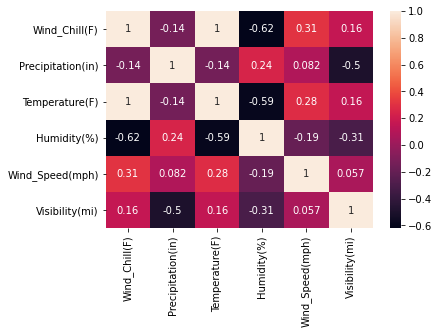

In [14]:
X = weather_df[['Wind_Chill(F)', 'Precipitation(in)', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)', 'Visibility(mi)']]
X.corr()
sns.heatmap(X.corr(), annot = True)
plt.show()

In [15]:
weather_df = weather_df.drop(columns=['Selected', 'Wind_Chill(F)', 'Precipitation(in)'])
weather_df.head()

,Year,Day,Month,Hour,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
0,2020,27,7,18,Fair,64.0,70.0,20.0,10.0
1,2017,30,9,17,Partly Cloudy,71.1,57.0,9.2,10.0
2,2017,27,6,5,Overcast,57.9,87.0,15.0,9.0
3,2016,7,9,9,Clear,66.9,73.0,4.6,10.0
4,2019,19,10,2,Fair,52.0,89.0,0.0,9.0


In [16]:
for i in weather_df.columns:
    print(i)
    print(weather_df[i].isnull().values.any())
    print()

Year
False

Day
False

Month
False

Hour
False

Weather_Condition
True

Temperature(F)
True

Humidity(%)
True

Wind_Speed(mph)
True

Visibility(mi)
True



## End of weather dataset
_____________________________________________________________________________

The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

# df2 is the train dataset but with Regex to change the feat

In [17]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

df2 = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df2.shape))

df2.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [18]:
df2[['Date','Time']] = df2.timestamp.str.split(expand=True)

df2.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,Date,Time
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02,2016-03-25,15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00,2020-05-05,19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16,2016-09-16,19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43,2020-03-29,19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00,2019-10-09,08:47:00


In [19]:
df2[['year','month','day']] = df2.Date.apply(lambda x: pd.Series(str(x).split("-")))

df2.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,Stop,Amenity,Side,Severity,timestamp,Date,Time,year,month,day
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,...,False,True,R,2,2016-03-25 15:13:02,2016-03-25,15:13:02,2016,03,25
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,...,False,False,R,2,2020-05-05 19:23:00,2020-05-05,19:23:00,2020,05,05
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,...,True,False,R,3,2016-09-16 19:57:16,2016-09-16,19:57:16,2016,09,16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,...,False,False,R,1,2020-03-29 19:48:43,2020-03-29,19:48:43,2020,03,29
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,...,False,False,R,2,2019-10-09 08:47:00,2019-10-09,08:47:00,2019,10,09


In [20]:
df2[['hour','minutes','seconds']] = df2.Time.apply(lambda x: pd.Series(str(x).split(":")))

df2.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,Severity,timestamp,Date,Time,year,month,day,hour,minutes,seconds
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,...,2,2016-03-25 15:13:02,2016-03-25,15:13:02,2016,03,25,15,13,02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,...,2,2020-05-05 19:23:00,2020-05-05,19:23:00,2020,05,05,19,23,00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,...,3,2016-09-16 19:57:16,2016-09-16,19:57:16,2016,09,16,19,57,16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,...,1,2020-03-29 19:48:43,2020-03-29,19:48:43,2020,03,29,19,48,43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,...,2,2019-10-09 08:47:00,2019-10-09,08:47:00,2019,10,09,08,47,00


In [21]:
df3 = pd.get_dummies(df2['Side'])

df3.head()

,L,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
df2 = df2.join(pd.get_dummies(df2['Side']))

df2.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,Date,Time,year,month,day,hour,minutes,seconds,L,R
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,...,2016-03-25,15:13:02,2016,03,25,15,13,02,0,1
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,...,2020-05-05,19:23:00,2020,05,05,19,23,00,0,1
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,...,2016-09-16,19:57:16,2016,09,16,19,57,16,0,1
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,...,2020-03-29,19:48:43,2020,03,29,19,48,43,0,1
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,...,2019-10-09,08:47:00,2019,10,09,08,47,00,0,1


In [23]:
df2 = df2.drop(columns=['L','Side'])

df2 = df2.rename(columns={'R': 'Side'})
                 
df2.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,timestamp,Date,Time,year,month,day,hour,minutes,seconds,Side
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,...,2016-03-25 15:13:02,2016-03-25,15:13:02,2016,03,25,15,13,02,1
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,...,2020-05-05 19:23:00,2020-05-05,19:23:00,2020,05,05,19,23,00,1
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,...,2016-09-16 19:57:16,2016-09-16,19:57:16,2016,09,16,19,57,16,1
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,...,2020-03-29 19:48:43,2020-03-29,19:48:43,2020,03,29,19,48,43,1
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,...,2019-10-09 08:47:00,2019-10-09,08:47:00,2019,10,09,08,47,00,1


In [24]:
for i in df2.columns:
    if df2[i].dtype in ['object', 'bool']:
        print(df2[i].value_counts(), '\n')

False    6407
Name: Bump, dtype: int64 

False    5879
True      528
Name: Crossing, dtype: int64 

False    6404
True        3
Name: Give_Way, dtype: int64 

False    4828
True     1579
Name: Junction, dtype: int64 

False    6406
True        1
Name: No_Exit, dtype: int64 

False    6237
True      170
Name: Railway, dtype: int64 

False    6407
Name: Roundabout, dtype: int64 

False    5781
True      626
Name: Stop, dtype: int64 

False    6169
True      238
Name: Amenity, dtype: int64 

2017-12-01 14:48:24    5
2020-12-07 17:04:30    5
2020-11-30 19:02:00    4
2020-11-24 20:08:00    4
2018-01-06 09:44:27    4
                      ..
2017-08-31 08:13:08    1
2018-11-24 06:35:05    1
2016-08-18 13:21:54    1
2019-12-20 15:09:28    1
2016-10-18 15:52:10    1
Name: timestamp, Length: 6248, dtype: int64 

2020-04-04    33
2020-11-17    20
2020-05-14    20
2020-12-30    19
2019-11-08    18
              ..
2017-12-29     1
2017-11-18     1
2020-07-24     1
2019-05-07     1
2017-10-03     

In [25]:
df2['Severity'].value_counts()

2    4346
3    1855
1     129
4      77
Name: Severity, dtype: int64

# End of df2 
-----------------------------------------------------------------------

# Merging and Data manipulation

In [26]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Temperature(F)     6899 non-null   float64
 6   Humidity(%)        6899 non-null   float64
 7   Wind_Speed(mph)    6556 non-null   float64
 8   Visibility(mi)     6900 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 485.4+ KB


In [27]:
weather_df = weather_df.fillna(weather_df.mean())
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Temperature(F)     6901 non-null   float64
 6   Humidity(%)        6901 non-null   float64
 7   Wind_Speed(mph)    6901 non-null   float64
 8   Visibility(mi)     6901 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 485.4+ KB


In [28]:
weather_df = weather_df.fillna(weather_df.mode().iloc[0])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6901 non-null   object 
 5   Temperature(F)     6901 non-null   float64
 6   Humidity(%)        6901 non-null   float64
 7   Wind_Speed(mph)    6901 non-null   float64
 8   Visibility(mi)     6901 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 485.4+ KB


In [29]:
weather_df = weather_df.drop_duplicates(['Year','Month', 'Day', 'Hour'])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5972 entries, 0 to 6900
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5972 non-null   int64  
 1   Day                5972 non-null   int64  
 2   Month              5972 non-null   int64  
 3   Hour               5972 non-null   int64  
 4   Weather_Condition  5972 non-null   object 
 5   Temperature(F)     5972 non-null   float64
 6   Humidity(%)        5972 non-null   float64
 7   Wind_Speed(mph)    5972 non-null   float64
 8   Visibility(mi)     5972 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 466.6+ KB


In [30]:
def merge_weather(df):
    merge_list = ['Year','Month', 'Day', 'Hour']
    new_df = df.merge(weather_df,  how='left', on=merge_list)
    return new_df

In [31]:
def add_time_cols(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['Hour'] = df['timestamp'].apply(lambda x : x.hour)
    df['Day'] = df['timestamp'].apply(lambda x : x.day)
    df['Month'] = df['timestamp'].apply(lambda x : x.month)
    df['Year'] = df['timestamp'].apply(lambda x : x.year)
    return df

In [32]:
def add_is_holiday(df):
    df['holiday'] = df['timestamp'].dt.date.isin(holidays)
    return df

In [33]:
df_class_1 = df[df['Severity'] == 1]
df_class_2 = df[df['Severity'] == 2]
df_class_3 = df[df['Severity'] == 3]
df_class_4 = df[df['Severity'] == 4]
df_class_1_under = df_class_1.sample(len(df_class_4))
df_class_2_under = df_class_2.sample(len(df_class_4))
df_class_3_under = df_class_3.sample(len(df_class_4))
df_balanced_under = pd.concat([df_class_1_under, df_class_2_under, df_class_3_under, df_class_4])
df_balanced_under['Severity'].value_counts()

1    77
2    77
3    77
4    77
Name: Severity, dtype: int64

In [34]:
X = add_time_cols(df_balanced_under)
X = merge_weather(X)
X.columns

Index(['ID', 'Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'Severity', 'timestamp', 'Hour', 'Day', 'Month', 'Year',
       'Weather_Condition', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)',
       'Visibility(mi)'],
      dtype='object')

In [35]:
X.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,timestamp,Hour,Day,Month,Year,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
0,5205,37.73679,-122.40319,False,0.0,False,False,False,False,False,...,2020-04-16 20:11:04,20,16,4,2020,Cloudy,55.0,77.0,8.0,10.0
1,2741,37.74492,-122.40505,False,0.0,False,False,True,False,False,...,2020-04-16 21:18:44,21,16,4,2020,Cloudy,55.0,77.0,8.0,10.0
2,1566,37.77286,-122.40655,False,0.0,False,False,True,False,False,...,2020-04-19 20:59:15,20,19,4,2020,Fair,55.0,69.0,10.0,10.0
3,4591,37.78456,-122.39354,False,0.0,False,False,False,False,False,...,2020-05-24 05:45:00,5,24,5,2020,Mostly Cloudy,53.0,80.0,3.0,10.0
4,4927,37.81053,-122.36464,False,0.0,False,False,True,False,False,...,2020-04-04 17:07:50,17,4,4,2020,Light Rain,55.0,89.0,14.0,5.0


# Plots

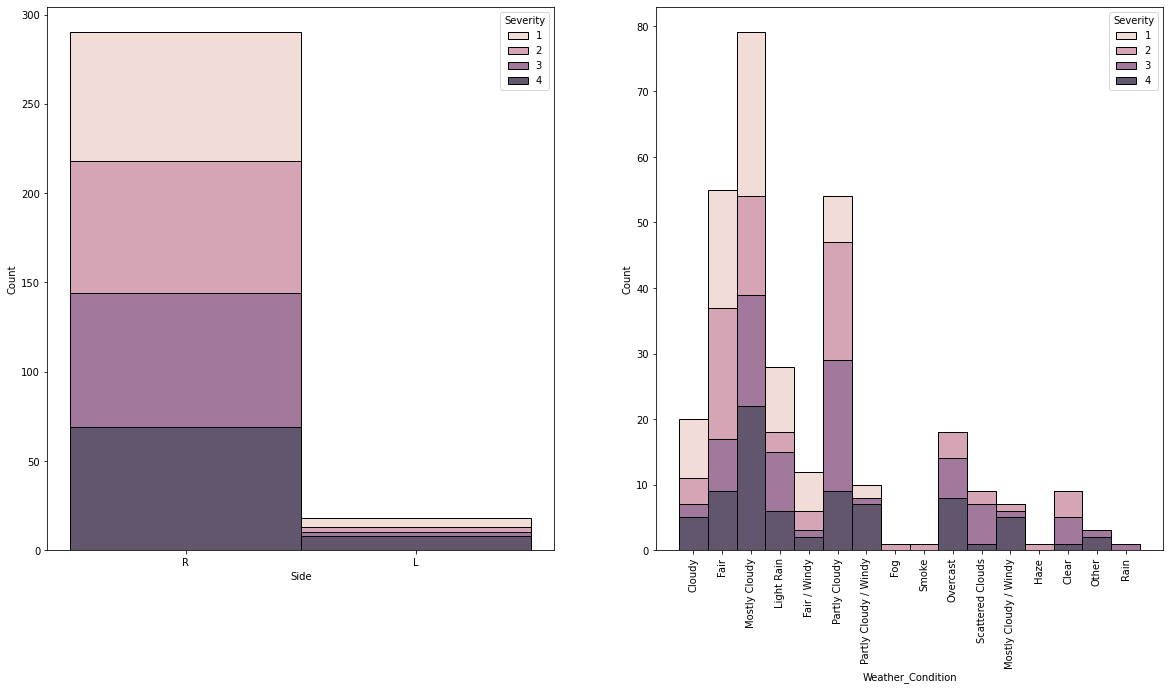

In [36]:
object_col = [c for c in X.columns if X[c].dtype == 'object']
fig, ax = plt.subplots(1,len(object_col), figsize = (20,10))
for i, c in enumerate(object_col):
    sns.histplot(binwidth=0.5, x=c, hue="Severity", data=X, stat="count", multiple="stack", ax=ax[i])
plt.xticks(rotation=90)
plt.show()

# Pipeline

In [37]:
encoder = OneHotEncoder(handle_unknown='ignore')
def pipline(df, my_list, is_train=False):
    df = add_time_cols(df)
    df = merge_weather(df)
    df = add_is_holiday(df)
    df = df[my_list]
    object_cols = [c for c in df.columns if df[c].dtype == 'object']
    if is_train:
        encoder.fit(df[object_cols])
    X = pd.DataFrame(encoder.transform(df[object_cols]).toarray(), columns=encoder.get_feature_names(object_cols))
    df = df.drop(columns=object_cols)
    df = pd.concat([df, X], axis=1)
    return df

In [38]:
df.columns

Index(['ID', 'Lat', 'Lng', 'Bump', 'Distance(mi)', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop', 'Amenity',
       'Side', 'Severity', 'timestamp'],
      dtype='object')

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [39]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42 ,stratify = df['Severity'] ) # Try adding `stratify` here
# print("train_df =\n",train_df)
# print("val_df =\n",val_df)

In [40]:
X_train = train_df.drop(columns=['ID', 'Severity'])
# print("X_train =\n",X_train)
y_train = train_df['Severity']
# print("y_train =\n",y_train)

In [41]:
X_val = val_df.drop(columns=['ID', 'Severity'])
# print("X_val =\n",X_val)
y_val = val_df['Severity']
# print("y_val =\n",y_val)

As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

In [42]:
# # This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
# X_train = X_train[['Lat', 'Lng', 'Distance(mi)','Crossing','Junction','Railway','Stop','Amenity','Side']]
# # print("X_train = \n",X_train)
# X_val = X_val[['Lat', 'Lng', 'Distance(mi)','Crossing','Junction','Railway','Stop','Amenity','Side']]
# # print("X_val = \n",X_val)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 454 to 5043
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lat           5125 non-null   float64
 1   Lng           5125 non-null   float64
 2   Bump          5125 non-null   bool   
 3   Distance(mi)  5125 non-null   float64
 4   Crossing      5125 non-null   bool   
 5   Give_Way      5125 non-null   bool   
 6   Junction      5125 non-null   bool   
 7   No_Exit       5125 non-null   bool   
 8   Railway       5125 non-null   bool   
 9   Roundabout    5125 non-null   bool   
 10  Stop          5125 non-null   bool   
 11  Amenity       5125 non-null   bool   
 12  Side          5125 non-null   object 
 13  timestamp     5125 non-null   object 
dtypes: bool(9), float64(3), object(2)
memory usage: 285.3+ KB


## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
# classifier = classifier.fit(X_train, y_train)

In [45]:
from itertools import combinations
cols = ['Crossing',
       'Stop', 'Amenity',
       'Side', 'Hour', 'Month',
       'Year', 'Weather_Condition', 'Humidity(%)',
       'Wind_Speed(mph)']
# cols = ['Side', 'Year', 'Humidity(%)']
max_score = 0
best_features = []
best_classifier = None
for i in range(len(cols) + 1):
    for j in combinations(cols, i):
        my_list = ['Lat', 'Lng', 'Distance(mi)']
        my_list += list(j)
        X_train_curr = pipline(X_train, my_list, True)
        X_val_curr = pipline(X_val, my_list)
        # Train the classifier
        classifier = classifier.fit(X_train_curr, y_train)
        score = classifier.score(X_val_curr, y_val)
        print("The accuracy of the classifier on the validation set is ",score)
        print("the trials List ", my_list)
        if max_score < score:
            max_score = score
            best_features = my_list
            best_classifier = classifier

print("The best accuracy of the classifier on the validation set is ", max_score)
print("Features List ", best_features)
classifier = best_classifier

The accuracy of the classifier on the validation set is  0.7402496099843994
the trials List  ['Lat', 'Lng', 'Distance(mi)']
The accuracy of the classifier on the validation set is  0.7386895475819033
the trials List  ['Lat', 'Lng', 'Distance(mi)', 'Crossing']
The accuracy of the classifier on the validation set is  0.7449297971918877
the trials List  ['Lat', 'Lng', 'Distance(mi)', 'Stop']
The accuracy of the classifier on the validation set is  0.7394695787831513
the trials List  ['Lat', 'Lng', 'Distance(mi)', 'Amenity']
The accuracy of the classifier on the validation set is  0.7394695787831513
the trials List  ['Lat', 'Lng', 'Distance(mi)', 'Side']
The accuracy of the classifier on the validation set is  0.7394695787831513
the trials List  ['Lat', 'Lng', 'Distance(mi)', 'Hour']
The accuracy of the classifier on the validation set is  0.7394695787831513
the trials List  ['Lat', 'Lng', 'Distance(mi)', 'Month']
The accuracy of the classifier on the validation set is  0.7394695787831513


## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [46]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [47]:
X_test = test_df.drop(columns=['ID'])

X_test = pipline(X_test, best_features)

y_test_predicted = classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()

ValueError: The number of features in X is different to the number of features of the fitted data. The fitted data had 2 features and the X has 1 features.

Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [ ]:
test_df[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!